In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [8]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx/')
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(),'html.parser')  

In [9]:
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [10]:
table = soup.find('table',{'class' : 'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [18]:
table.tr

<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="득점">R</a></th>
<th><a href="javascript:sort('HIT_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="안타">H</a></th>
<th><a href="javascript:sort('H2_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="2루타">2B</a></th>
<th><a href="javascript:sort('H3_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="3루타">3B</a></th>
<th><a href="javascript:sort('HR_

In [100]:
# 테이블에서 선수명, AVG, H(안타수), HR(홈런), RBI(타점)
# csv 파일저장
# 시각화
# DB 입력

player_list = []
bat_avg_list = []
hit_list = []
homerun_list = []
rbi_list = []
data = []


for tr in table.find_all('tr'):
#     print(tr.find_all('td'))
    tds = tr.find_all('td')
    # 첫번째 tr의 각각의 td 출력
    for td in tds :
#         print(td)
        if td.find('a') :
#             print(td.find('a').text)
            player_list.append(td.find('a').text)
#             print(tds[3].text)
            bat_avg_list.append(tds[3].text)
#             print(tds[8].text)
            hit_list.append(tds[8].text)
            homerun_list.append(tds[11].text)
            rbi_list.append(tds[13].text)
            data.append([td.find('a').text,tds[3].text,tds[8].text,tds[11].text,tds[13].text])

In [101]:
data

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [102]:
# csv 파일 저장
with open('baseball.csv','w',encoding='cp949') as file :
    for d in data :
        file.write('{},{},{},{},{}\n'.format(d[0],d[1],d[2],d[3],d[4]))
print('file save ok!')

file save ok!


In [11]:
import pandas as pd
import numpy as np
load_data = pd.read_csv('./baseball.csv',header=None,encoding='cp949')
load_data

,0,1,2,3,4
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [246]:
baseballDF = pd.DataFrame({
    'player' : player_list, 
    'bat_avg' : bat_avg_list,
    'hit' : hit_list,
    'homerun' : homerun_list,
    'rbi' : rbi_list,
})
baseballDF

,player,bat_avg,hit,homerun,rbi
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [247]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
baseballDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   30 non-null     object
 1   bat_avg  30 non-null     object
 2   hit      30 non-null     object
 3   homerun  30 non-null     object
 4   rbi      30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [248]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [249]:
baseballDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   30 non-null     object
 1   bat_avg  30 non-null     object
 2   hit      30 non-null     object
 3   homerun  30 non-null     object
 4   rbi      30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [258]:
baseballDF['player'] = baseballDF['player'].astype('str')
baseballDF['bat_avg'] = baseballDF['bat_avg'].astype('float')
baseballDF['hit'] = baseballDF['hit'].astype('int')
baseballDF['homerun'] = baseballDF['homerun'].astype('int')
baseballDF['rbi'] = baseballDF['rbi'].astype('int')

In [259]:
baseballDF

,player,bat_avg,hit,homerun,rbi
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [252]:
baseballDF.index

RangeIndex(start=0, stop=30, step=1)

In [260]:
baseballDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   player   30 non-null     object 
 1   bat_avg  30 non-null     float64
 2   hit      30 non-null     int32  
 3   homerun  30 non-null     int32  
 4   rbi      30 non-null     int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 968.0+ bytes


In [261]:
baseballDF.columns

Index(['player', 'bat_avg', 'hit', 'homerun', 'rbi'], dtype='object')

<Figure size 432x288 with 0 Axes>

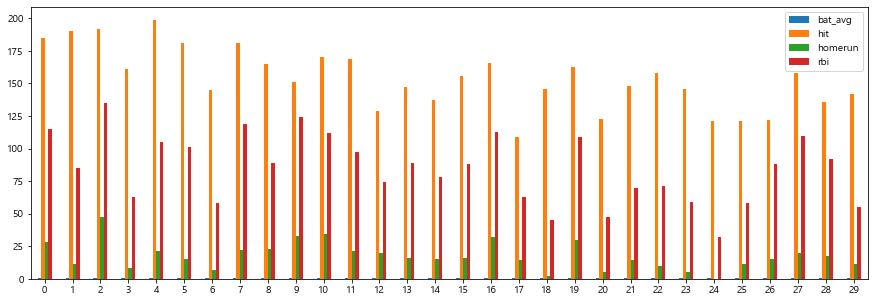

In [262]:
plt.figure()

baseballDF.plot(kind='bar',
                rot = True,
               figsize=(15,5))

plt.show()
plt.close()

In [185]:
baseballDF.to_csv('baseballDF.csv',mode='w',encoding='cp949')
print('success')

success


In [187]:
import pymongo as mongo

In [188]:
conn = mongo.MongoClient()

In [189]:
KBODB = conn.KBODB
KBODB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'KBODB')

In [191]:
KBOCollection = KBODB.KBO
KBOCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'KBODB'), 'KBO')

In [192]:
data

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [195]:
for idx, obj in enumerate(data) :
#     print(idx, obj)
    KBOCollection.insert_one({
        'player' : idx,
        'bat_avg' : obj[0],
        'hit' : obj[1],
        'homerun' : obj[2],
        'rbi' : obj[3],
    })

In [196]:
cursor = KBOCollection.find()
for c in cursor :
    print(c)

{'_id': ObjectId('60483c922d8320c76bdb99f0'), 'player': 0, 'bat_avg': '최형우', 'hit': '0.354', 'homerun': '185', 'rbi': '28'}
{'_id': ObjectId('60483c922d8320c76bdb99f1'), 'player': 1, 'bat_avg': '손아섭', 'hit': '0.352', 'homerun': '190', 'rbi': '11'}
{'_id': ObjectId('60483c922d8320c76bdb99f2'), 'player': 2, 'bat_avg': '로하스', 'hit': '0.349', 'homerun': '192', 'rbi': '47'}
{'_id': ObjectId('60483c922d8320c76bdb99f3'), 'player': 3, 'bat_avg': '박민우', 'hit': '0.345', 'homerun': '161', 'rbi': '8'}
{'_id': ObjectId('60483c922d8320c76bdb99f4'), 'player': 4, 'bat_avg': '페르난데스', 'hit': '0.340', 'homerun': '199', 'rbi': '21'}
{'_id': ObjectId('60483c922d8320c76bdb99f5'), 'player': 5, 'bat_avg': '이정후', 'hit': '0.333', 'homerun': '181', 'rbi': '15'}
{'_id': ObjectId('60483c922d8320c76bdb99f6'), 'player': 6, 'bat_avg': '허경민', 'hit': '0.332', 'homerun': '145', 'rbi': '7'}
{'_id': ObjectId('60483c922d8320c76bdb99f7'), 'player': 7, 'bat_avg': '김현수', 'hit': '0.331', 'homerun': '181', 'rbi': '22'}
{'_id': 

### image scraping

In [197]:
from urllib.parse import quote_plus

In [200]:
baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
searchKeyword = input('검색어 입력 : ')
maxCnt = int(input('scraping num : '))

url = baseUrl + quote_plus(searchKeyword) # 자동으로 한글변환

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(),'html.parser')  
    
soup

검색어 입력 : 강아지
scraping num : 20


<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="강아지 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>강아지 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210304.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

In [208]:
img = soup.find('img')
img

<img alt="로딩중" class="bg_loading" height="10" src="https://ssl.pstatic.net/sstatic/search/pc/2016/img/blank.gif" width="100%"/>

In [222]:
img = soup.find_all('img',{'class' : 'tile_item _item'})
img

[]

In [223]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210309'

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(),'html.parser')  
    
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210309" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [230]:
# 영화명
# text, string, get_text()
soup.find_all('div','tit5')[0].a.get_text()

'원더'

In [231]:
# 평점
soup.find_all('td','point')[0].string

'9.51'

In [232]:
# 영화명, 평점을 담는 리스트 생성
# list comprehenshion

movie_list = [soup.find_all('div','tit5')[n].a.string for n in range(0,50)]
point_list = [soup.find_all('td','point')[n].string for n in range(0,50)]


In [234]:
len(movie_list)

50

In [235]:
len(point_list)

50

In [236]:
print(movie_list)

['원더', '극장판 바이올렛 에버가든', '동주', '서유기 2 - 선리기연', '부활: 그 증거', '소울', '엽기적인 그녀', '나, 다니엘 블레이크', '극장판 귀멸의 칼날: 무한열차편', '똥파리', '서유기 - 월광보합', '해피 투게더', '라야와 마지막 드래곤', '러브레터', '싸이코', '타오르는 여인의 초상', '더 헌트', '남매의 여름밤', '러브 액츄얼리', '중경삼림', '나는 내일, 어제의 너와 만난다', '람보-특별판', '달라스 바이어스 클럽', '너의 이름은.', '화양연화', '더 포스트', '찬실이는 복도 많지', '당신, 거기 있어줄래요', '캐롤', '분노', '세자매', '그녀', '아비정전', '원챈스', '제로 다크 서티', '비포 미드나잇', '클로저', '하나와 앨리스', '해리 포터와 불의 잔', '무드 인디고', '일대종사', '날씨의 아이', '미나리', '별을 쫓는 아이', '철벽선생', '퍼펙트 케어', '톰과 제리', '미션 파서블', '은혼', '더블패티']


In [237]:
print(point_list)

['9.51', '9.50', '9.37', '9.36', '9.34', '9.31', '9.29', '9.28', '9.27', '9.22', '9.21', '9.20', '9.17', '9.12', '9.10', '9.06', '8.97', '8.95', '8.93', '8.92', '8.91', '8.88', '8.79', '8.79', '8.79', '8.76', '8.74', '8.71', '8.60', '8.55', '8.54', '8.53', '8.48', '8.32', '8.21', '8.19', '8.18', '8.11', '8.03', '8.02', '8.00', '7.95', '7.92', '7.92', '7.77', '7.67', '7.66', '7.62', '7.20', '7.14']


In [239]:
# 날짜 생성(50개) 오늘날짜를 기준으로 50일
# pd.date_range()
# 날짜, 영화명, 포인트 DataFrame 생성
date_list = pd.date_range('2021-3-10',periods=50)
date_list

movieDF = pd.DataFrame({
    '날짜' : date_list,
    '영화명' : movie_list,
    '포인트' : point_list
})

In [241]:
movieDF.head()

,날짜,영화명,포인트
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34


In [242]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   포인트     50 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ KB


In [243]:
# 타입변환
movieDF['포인트'] = movieDF['포인트'].astype(float)

In [244]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   포인트     50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ KB


In [255]:
movieDF.sort_values(by='포인트',ascending=False,inplace=True)

In [ ]:
# 영화별 평점 시각화, DB 생성


### 스크래핑 실습 & 워드클라우드

In [263]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx/')
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else :
    soup = BeautifulSoup(html.read(),'html.parser', from_encoding='utf-8')
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

- 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [267]:
soup.find_all('div',{'class' : 'Imdb-user-review'})

[]

### 자연어 처리
- JDK 설치 및 JAVA_HOME 존재
- pip install konlpy

### cmd
- python 
- import nltk
- nltk.download(stopwords,punkt)

### anaconda
- conda install -c conda-forge jpype1 (버전에 맞게 설치해줘야함)
- 버전 해결책 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- conda install -c conda-forge wordcloud
- conda install -c conda-forge gensim

In [4]:
from konlpy.tag import Kkma  
from wordcloud import WordCloud, STOPWORDS

In [6]:
kkoma = Kkma() 

In [10]:
# http://kkma.snu.ac.kr/documents/index.jsp?doc=postag 

In [7]:
kkoma.nouns('한국어 문장 분석 시작! 설치하는데 시간이 오래걸렸다')

['한국어', '문장', '분석', '시작', '설치', '시간']

In [8]:
kkoma.sentences('한국어 문장 분석 시작! 설치하는데 시간이 오래걸렸다')

['한국어 문장 분석 시작! 설치하는데 시간이 오래 걸렸다']

In [9]:
kkoma.pos('한국어 문장 분석 시작! 설치하는데 시간이 오래걸렸다')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('시작', 'NNG'),
 ('!', 'SF'),
 ('설치', 'NNG'),
 ('하', 'XSV'),
 ('는데', 'ECD'),
 ('시간', 'NNG'),
 ('이', 'JKS'),
 ('오래', 'MAG'),
 ('걸리', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN')]

In [13]:
import numpy as np
from PIL import Image

In [14]:
text = open('./data/07. alice.txt').read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [17]:
# 이미지파일 np.array 로 출력
# 0은 블랙, 255는 화이트
maskImg = np.array(Image.open('./data/07. alice_mask.png'))
maskImg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

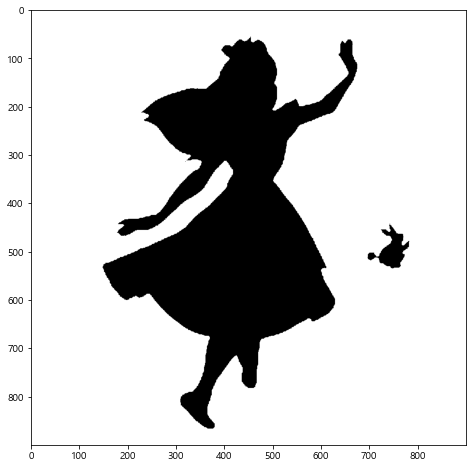

In [25]:
plt.figure(figsize=(8,8))

plt.imshow(maskImg,cmap=plt.cm.gray)
plt.show()


In [29]:
# 워드클라우드 생성
sw = set(STOPWORDS)
sw.add('said')
wc = WordCloud(mask=maskImg,max_words=2000,background_color='white')

In [31]:
# 워드클라우드에 단어입력
wc = wc.generate(text)

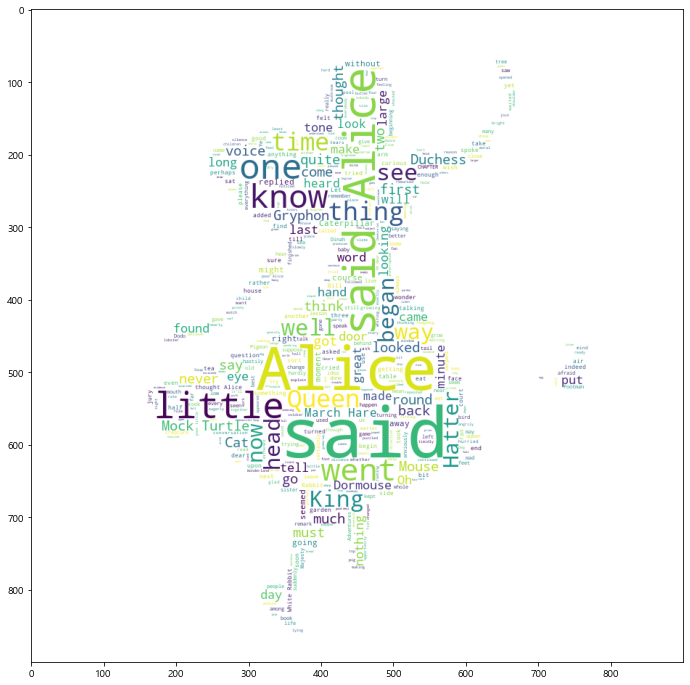

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.show()
plt.close()